In [103]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

In [104]:
df = pd.read_csv('/content/drive/MyDrive/covid_19_india.csv')

In [105]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [106]:
df.shape

(14690, 9)

In [107]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [108]:
df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [109]:
df.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [110]:
df

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,0,0,3
...,...,...,...,...,...,...,...
14685,14686,2021-05-08,8:00 AM,Telangana,413225,2666,487199
14686,14687,2021-05-08,8:00 AM,Tripura,34270,405,37208
14687,14688,2021-05-08,8:00 AM,Uttarakhand,158872,3430,229993
14688,14689,2021-05-08,8:00 AM,Uttar Pradesh,1184688,14873,1453679


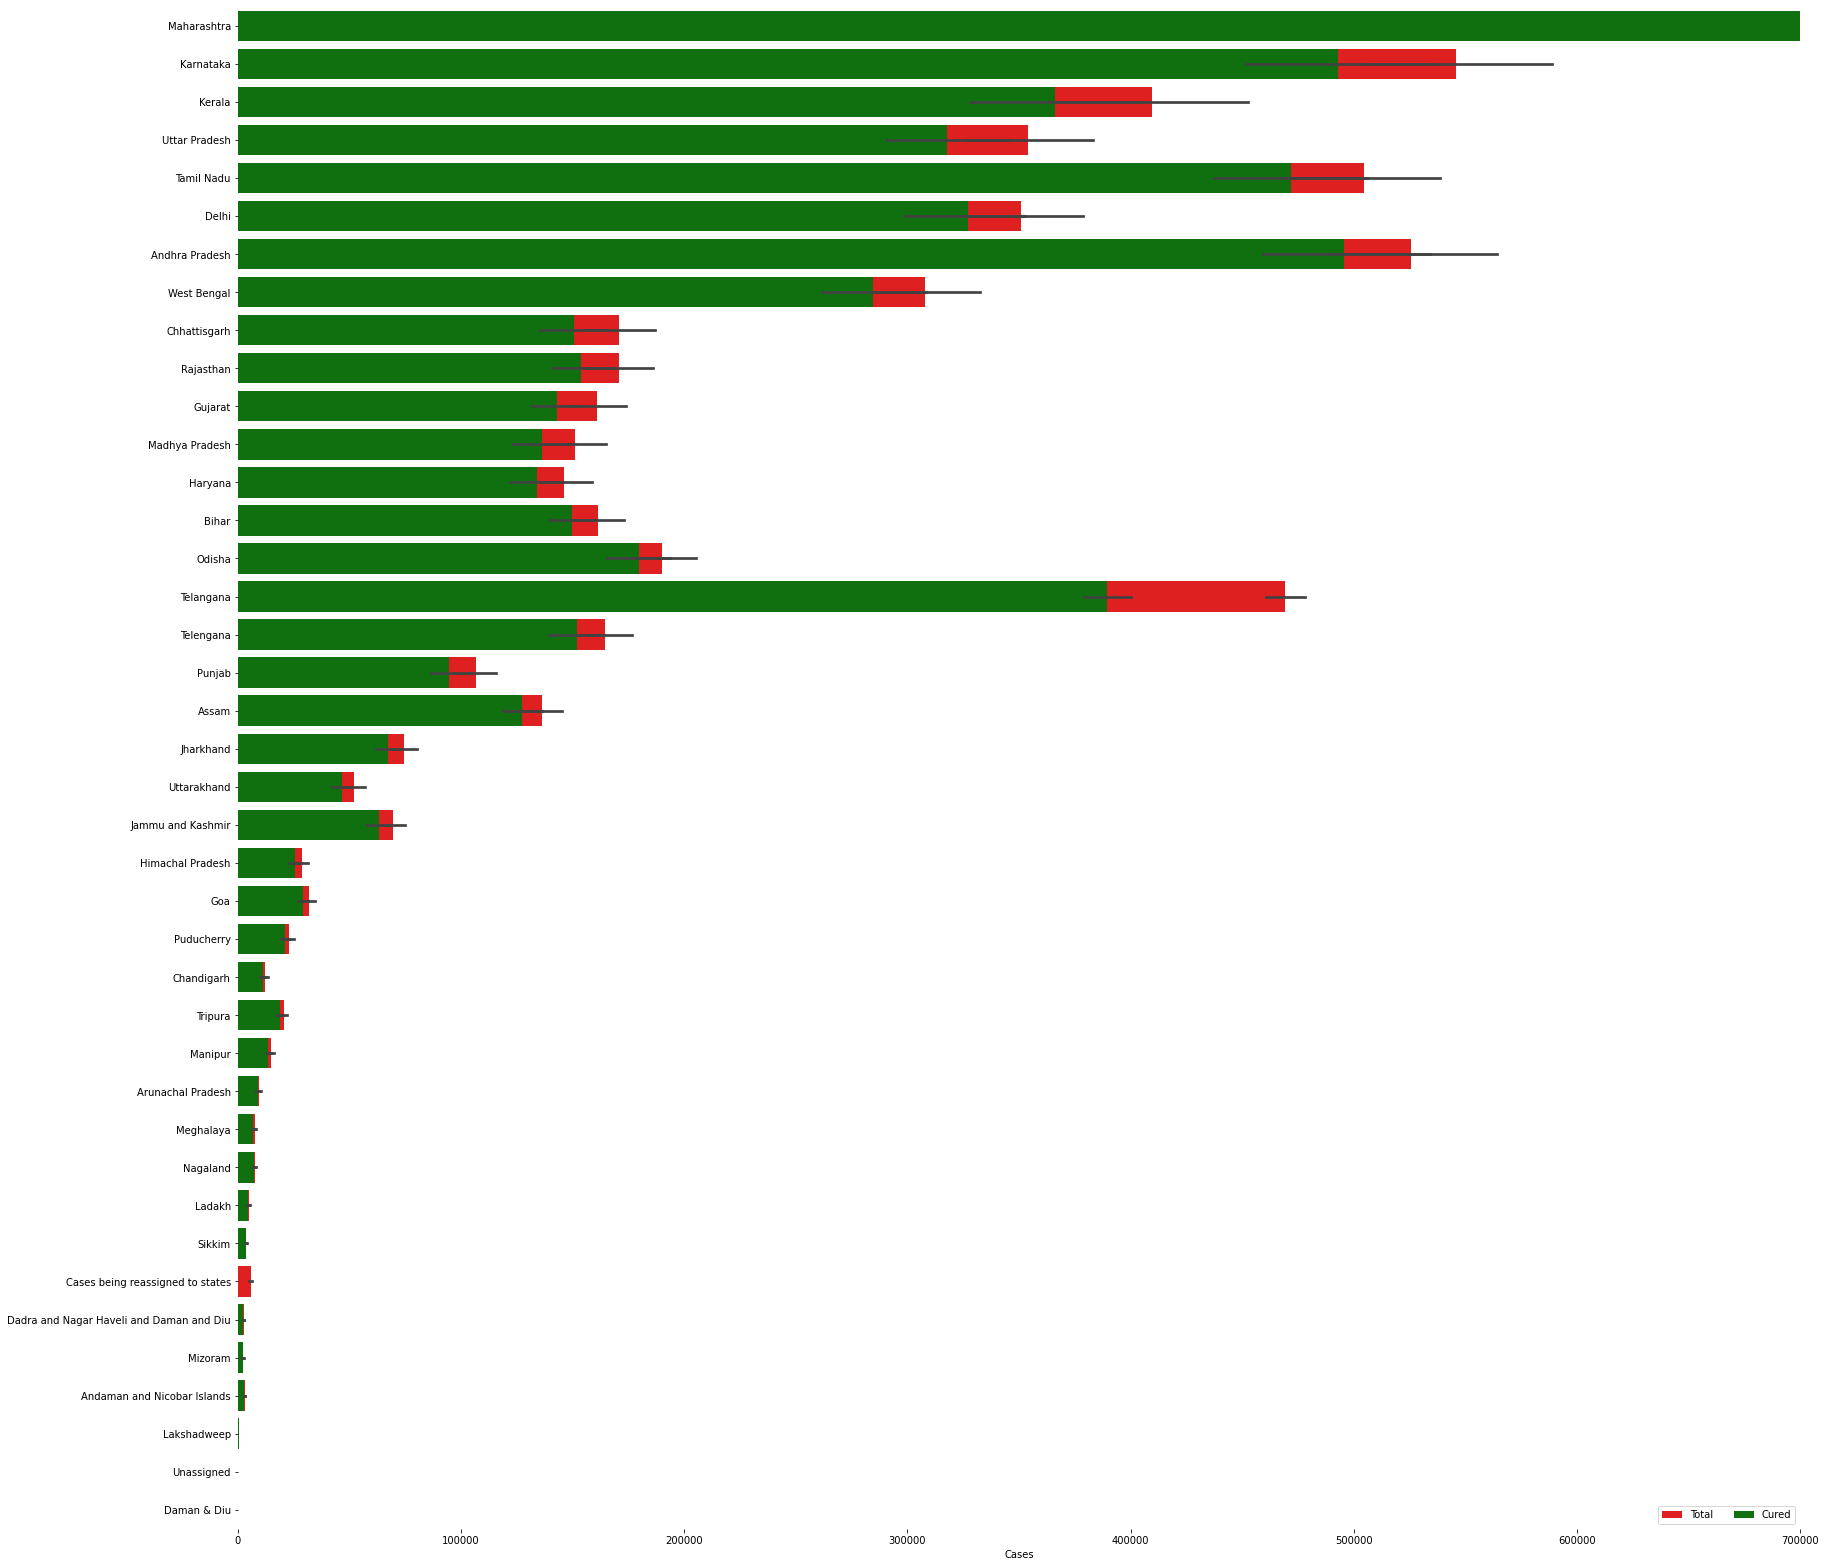

In [111]:
f, ax = plt.subplots(figsize=(28, 28))
data = df[['State/UnionTerritory','Confirmed','Cured','Deaths']]   
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 700000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [112]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True)

In [113]:
df_confirmed_india=df.groupby('Date')['Confirmed'].sum().reset_index()
df_cured_india=df.groupby('Date')['Cured'].sum().reset_index()
df_death_india=df.groupby('Date')['Deaths'].sum().reset_index()

In [114]:
print("The Confirmed Cases are",df_confirmed_india.Confirmed.max())
print("The Recovered Cases are",df_cured_india.Cured.max())
print("The Deaths Cases are",df_death_india.Deaths.max())

The Confirmed Cases are 21892676
The Recovered Cases are 17930960
The Deaths Cases are 238270


# Let's See the Day-wise cases on India
Confirmed Day wise Cases

In [115]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_confirmed_india['Date'], y = df_confirmed_india['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
# New COVID-19 cases reported daily in India
import plotly.express as px
fig = px.bar(df_confirmed_india, x="Date", y="Confirmed", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='gold')
fig.show()

# Deaths Day-Wise

In [116]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_death_india['Date'], y = df_death_india['Deaths'], mode='lines+markers',name='Total Deaths',line=dict(color='Red', width=2)))
fig.update_layout(title_text='Trend of Death Cases in India',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
# New COVID-19 cases reported daily in India
import plotly.express as px
fig = px.bar(df_death_india, x="Date", y="Deaths", barmode='group', height=500)
fig.update_layout(title_text='Coronavirus Deaths in India on daily basis',plot_bgcolor='lime')
fig.show()

# Let's Do in One graph to see te day-Wise Confirmed, Deaths and Cured cases

In [117]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_confirmed_india['Date'], y=df_confirmed_india['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=df_death_india['Date'], y=df_death_india['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=df_cured_india['Date'], y=df_cured_india['Cured'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='India COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

# Let's Now Analyze State-Wise Cases and Recovery

In [118]:
state_cases = df.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+ state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [119]:
state_cases.head()

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
0,Andaman and Nicobar Islands,6311,72,6030,209,1.14,95.55
1,Andhra Pradesh,1245374,8519,1050160,186695,0.68,84.32
2,Arunachal Pradesh,19802,60,17849,1893,0.30,90.14
3,Assam,283313,1578,246242,35493,0.56,86.92
4,Bihar,567269,3139,449063,115067,0.55,79.16


In [120]:
state_cases['State/UnionTerritory'].unique()



array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Telengana', 'Tripura', 'Unassigned', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [121]:
state_wise_cases=state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Oranges',subset=["Active"])\
                        .background_gradient(cmap='RdYlBu',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Accent',subset=["Cure Rate (per 100)"])

In [122]:
state_wise_cases

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
22,Maharashtra,4996758,74413,4265326,657019,1.490000,85.360000
17,Karnataka,1838885,17804,1284420,536661,0.970000,69.850000
18,Kerala,1824856,5682,1416177,402997,0.310000,77.600000
37,Uttar Pradesh,1453679,14873,1184688,254118,1.020000,81.500000
32,Tamil Nadu,1323965,15171,1173439,135355,1.150000,88.630000
10,Delhi,1292867,18739,1183093,91035,1.450000,91.510000
1,Andhra Pradesh,1245374,8519,1050160,186695,0.680000,84.320000
39,West Bengal,954282,12076,818108,124098,1.270000,85.730000
7,Chhattisgarh,830117,10158,688918,131041,1.220000,82.990000
30,Rajasthan,720799,5346,516306,199147,0.740000,71.630000


# In the Next cell we'll see this in a better visualization

# Which states are more affected by the virus?

In [123]:
pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [124]:
df['Fatality-Ratio'] = df['Deaths']/df['Confirmed']

In [125]:
df['Fatality-Ratio']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
14685    0.005472
14686    0.010885
14687    0.014913
14688    0.010231
14689    0.012655
Name: Fatality-Ratio, Length: 14690, dtype: float64

In [126]:
pip install chart_studio